In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import psyneulink as pnl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sys; sys.path.append('./shape-naming/')
import shape_naming_model

## Plotting utility

In [34]:
DEFAULT_FIGURE_SIZE = (18, 10)
DEFAULT_TITLES = ('72 epochs', '504 epochs', '2520 epochs')
ORDERED_KEYS = ('control', 'conflict', 'congruent')

def plot_by_condition(first_results, second_results=None, third_results=None,
                     figsize=DEFAULT_FIGURE_SIZE, titles=DEFAULT_TITLES,
                     ordered_keys=ORDERED_KEYS):
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=DEFAULT_FIGURE_SIZE)
    fig.patch.set_facecolor('#DDDDDD')
    fig.suptitle('Figure 12', fontsize=24)

    plot_single_result_set(ax1, first_results, titles[0], ordered_keys)
    if second_results is not None: 
        plot_single_result_set(ax2, second_results, titles[1], ordered_keys)
    if third_results is not None:
        plot_single_result_set(ax3, third_results, titles[2], ordered_keys)
    
    plt.show()
    
def plot_single_result_set(ax, results, title, ordered_keys):
    shape_naming, color_naming, _ = results
    shape_naming_avg = [np.average(shape_naming[key]) for key in ordered_keys]
    shape_naming_std = [np.std(shape_naming[key]) for key in ordered_keys]
    
    color_naming_avg = [np.average(color_naming[key]) for key in ordered_keys]
    color_naming_std = [np.std(color_naming[key]) for key in ordered_keys]
    x_values = np.arange(3)
                                  
    ax.errorbar(x_values, shape_naming_avg, yerr=shape_naming_std, marker='o', 
                markersize=10, capsize=10, label='shape')
    ax.errorbar(x_values, color_naming_avg, yerr=color_naming_std, marker='s', 
                markersize=10, capsize=10, label='color')

    ax.set_xticks(x_values)
    ax.set_xticklabels(ordered_keys)
    ax.tick_params(length=15, labelsize=16)
    ax.legend(fontsize=16)
    ax.set_title(title, dict(fontsize=16))

## First day

Create the model, train it on a day's worth of stimuli, test, plot the results

In [4]:
model = shape_naming_model.ShapeNamingModel(2)

In [5]:
# model.system.show_graph(show_dimensions=pnl.ALL, show_projection_labels=pnl.ALL, show_processes=pnl.ALL, output_fmt='jupyter')

In [6]:
first_day_train = model.train()

In [7]:
first_test_results = model.test()

In [8]:
shape_naming_results, color_naming_results, run_shape_naming_first = first_test_results

In [9]:
print('Shape-naming')
for key in shape_naming_results:
    print(key, np.average(shape_naming_results[key]))
print()
print('Color-naming')
for key in shape_naming_results:
    print(key, np.average(color_naming_results[key]))

Shape-naming
control 59.9375
congruent 66.20833333333333
conflict 67.02083333333333

Color-naming
control 38.208333333333336
congruent 40.0
conflict 36.0625


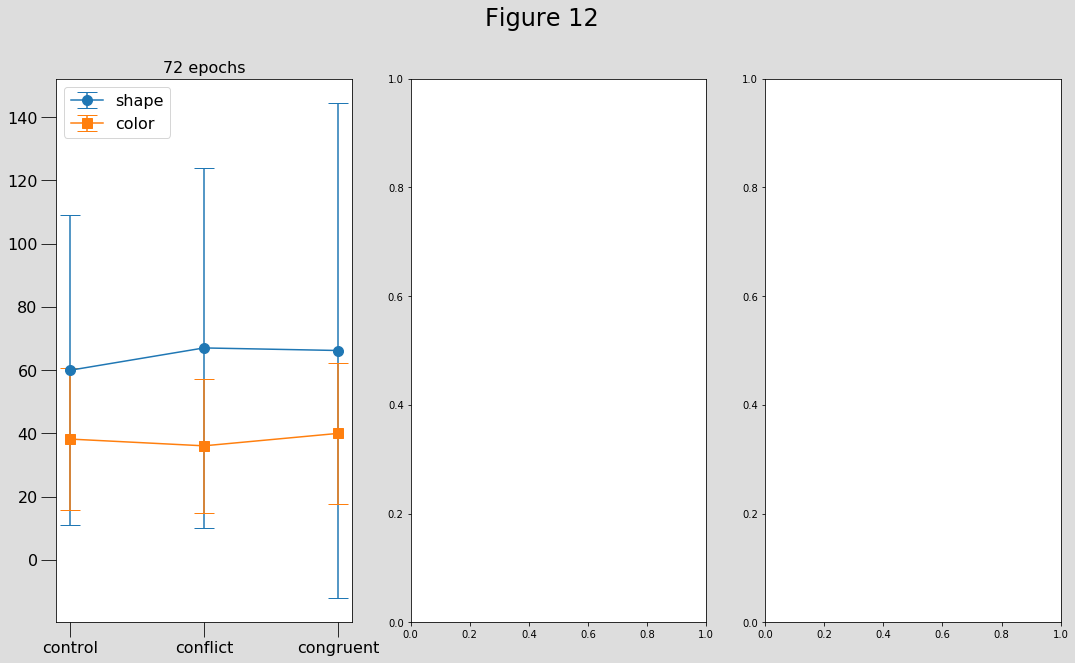

In [35]:
plot_by_condition(first_test_results)


## Train for another four days worth of training

This arrives at a total of 504 epochs, if my math is right

In [11]:
for i in range(4):
    model.train()

Test again, and then plot again

In [12]:
five_day_test_results = model.test()

In [13]:
five_day_shape_naming_results, five_day_color_naming_results, five_day_run_shape_naming_first = five_day_test_results

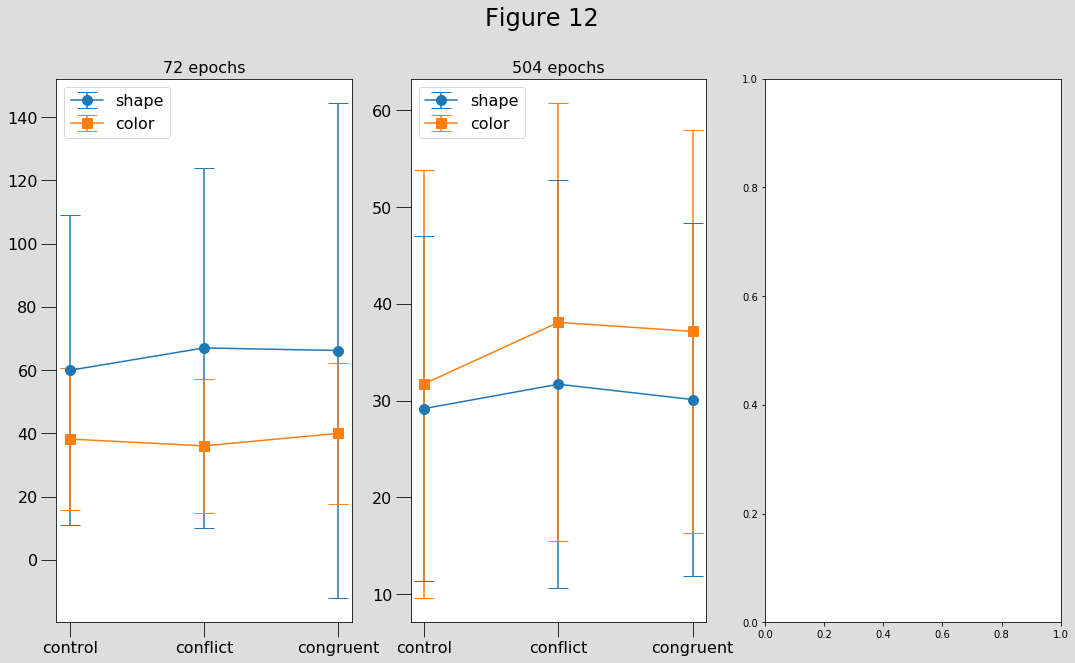

In [36]:
plot_by_condition(first_test_results, five_day_test_results)


## This is odd

After 504 training iterations, the shape-naming is already better than color naming. Additionally, the control conition appears harder than confluct, which is quite strange.

### TODO:

* Try fixing the indirect path's weights and seeing what this looks like

* ~~Verify that the stimuli I generate are all the correct ones~~

    * I definitly had a bug. Rerunning everything above to see if that fixes some of it.
    
    * It does. At least by the 5 day iteration, it looks better. However, the shape still learns much faster than the control. Additionally, why does the color-naming get better? Nothing in that pathway should learn.

In [17]:
fixed_indirect_weights = shape_naming_model.DEFAULT_WEIGHT_DICT.copy()
fixed_indirect_weights[shape_naming_model.SHAPE_FAST_KEY] = \
    np.matrix([[1, -1], [-1, 1]])

fixed_indirect_weights[shape_naming_model.FAST_OUTPUT_KEY] = \
    np.matrix([[1, -1], [-1, 1]])

fixed_indirect_model = shape_naming_model.ShapeNamingModel(
    2, weight_dict=fixed_indirect_weights, indirect_learning_rate=0)

In [20]:
fixed_indirect_day_one_train = fixed_indirect_model.train()

In [22]:
fixed_indirect_first_test_results = fixed_indirect_model.test()

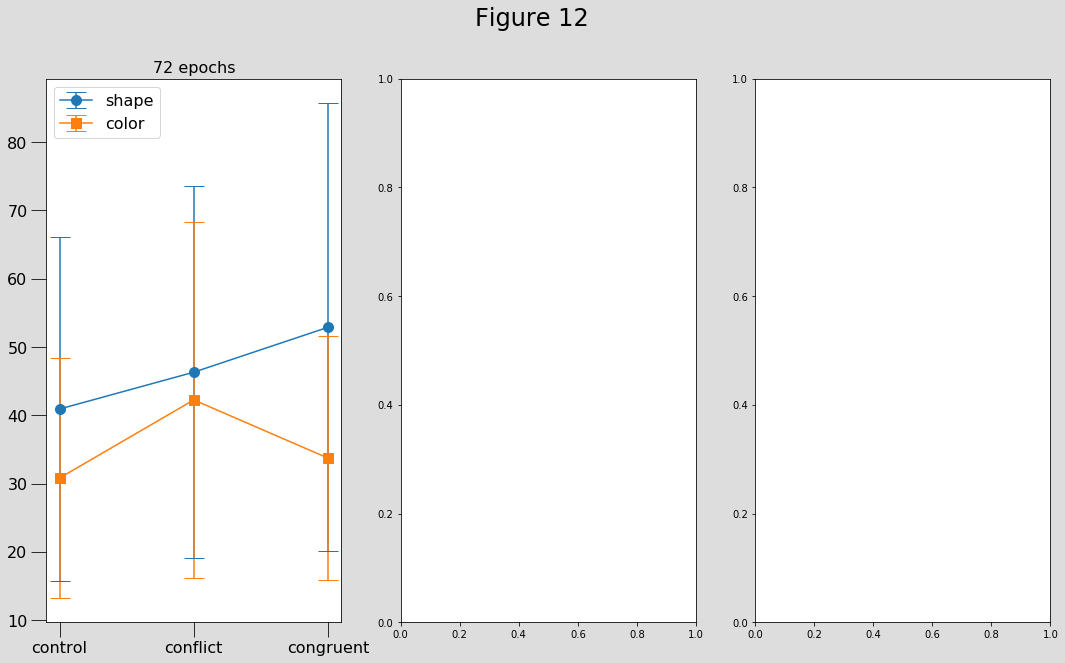

In [37]:
plot_by_condition(fixed_indirect_first_test_results)

In [24]:
for i in range(4):
    fixed_indirect_model.train()

In [25]:
fixed_indirect_five_day_test_results = fixed_indirect_model.test()

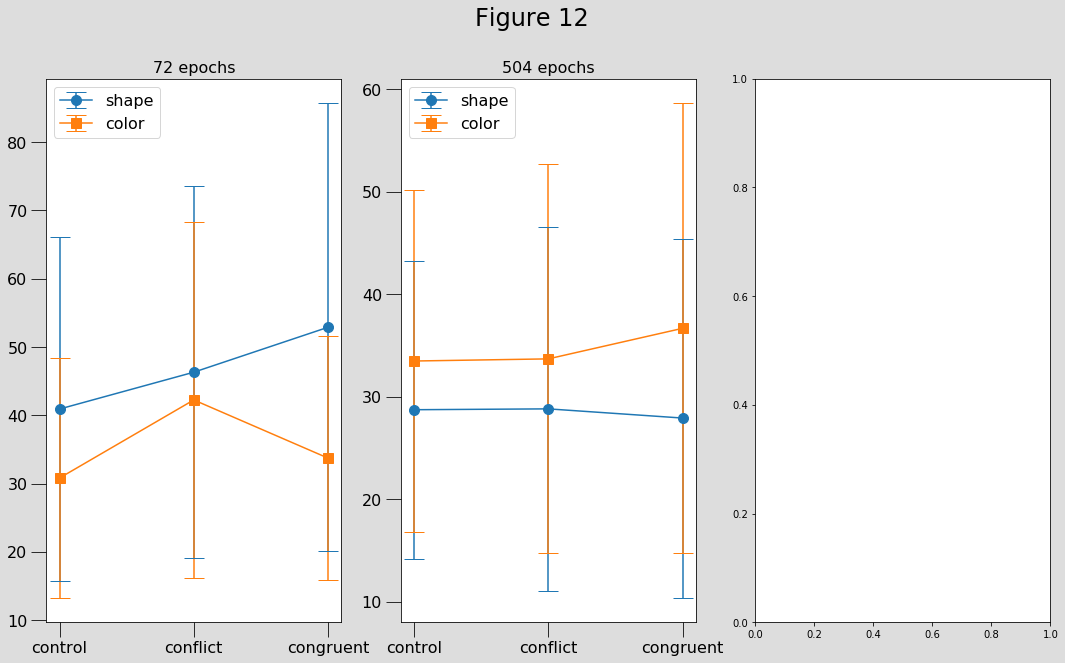

In [38]:
plot_by_condition(fixed_indirect_first_test_results, fixed_indirect_five_day_test_results)


### This is still faster, and there's something wonky going on in the congruent condition

Adding error bars to all plots above makes me think there's way too much noise. Let's reduce it (0.05 => 0.01) and try again

In [44]:
fixed_indirect_low_noise_model = shape_naming_model.ShapeNamingModel(
    2, weight_dict=fixed_indirect_weights, noise_std=0.01, indirect_learning_rate=0)

In [45]:
fixed_indirect_day_one_train = fixed_indirect_low_noise_model.train()
fixed_indirect_first_test_results = fixed_indirect_low_noise_model.test()

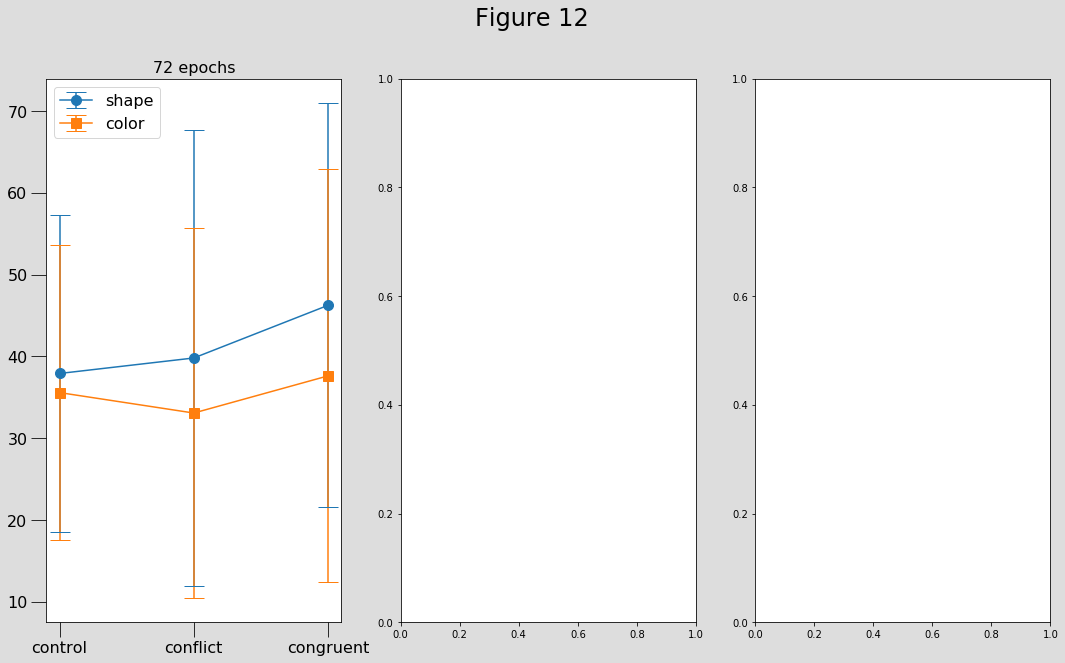

In [46]:
plot_by_condition(fixed_indirect_first_test_results)

In [47]:
for i in range(4):
    fixed_indirect_low_noise_model.train()

In [48]:
fixed_indirect_five_day_test_results = fixed_indirect_low_noise_model.test()

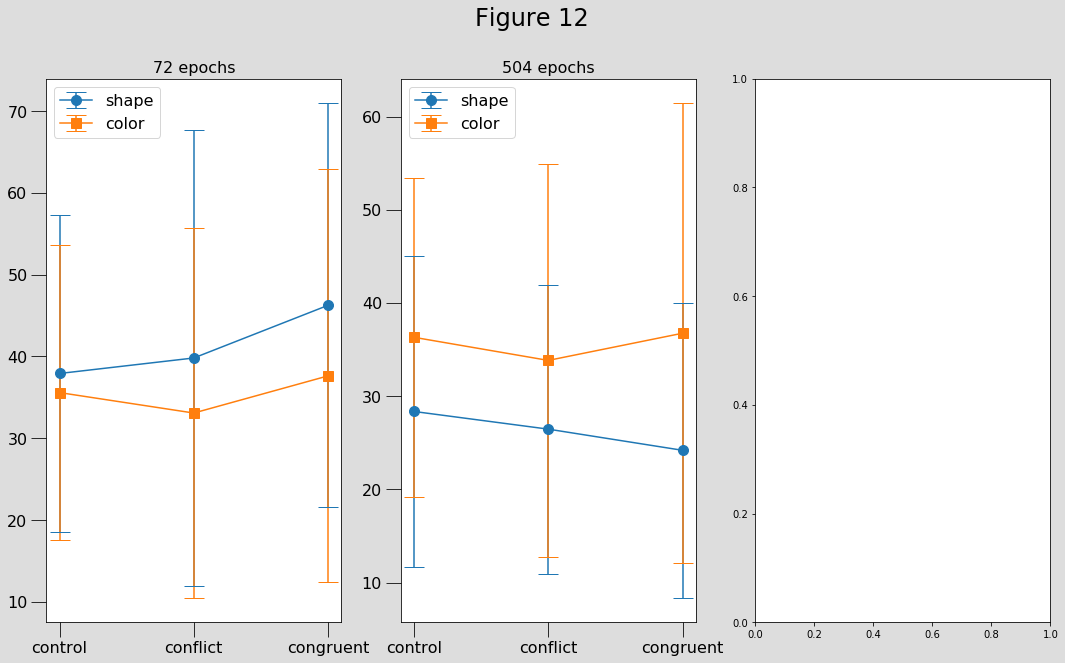

In [49]:
plot_by_condition(fixed_indirect_first_test_results, fixed_indirect_five_day_test_results)


### Let's try with a higher integration rate

In [ ]:
fixed_indirect_low_noise_high_int_model = shape_naming_model.ShapeNamingModel(
    2, weight_dict=fixed_indirect_weights, noise_std=0.01, integration_rate=0.3, indirect_learning_rate=0)

In [51]:
fixed_indirect_day_one_train = fixed_indirect_low_noise_high_int_model.train()
fixed_indirect_first_test_results = fixed_indirect_low_noise_high_int_model.test()

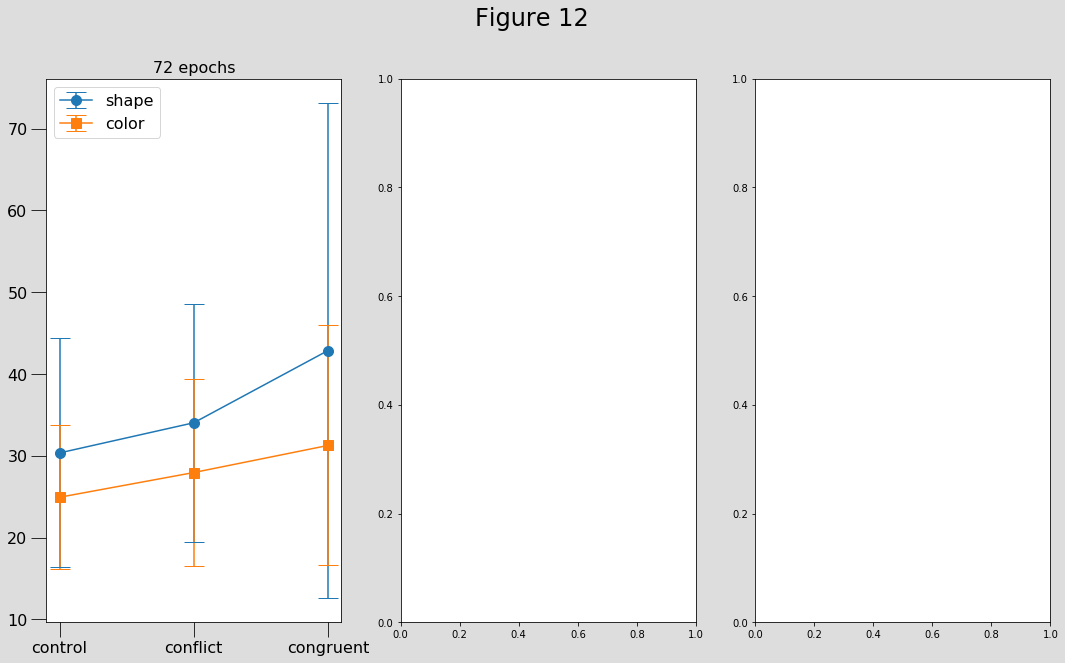

In [52]:
plot_by_condition(fixed_indirect_first_test_results)

In [53]:
for i in range(4):
    fixed_indirect_low_noise_high_int_model.train()
    
fixed_indirect_five_day_test_results = fixed_indirect_low_noise_high_int_model.test()

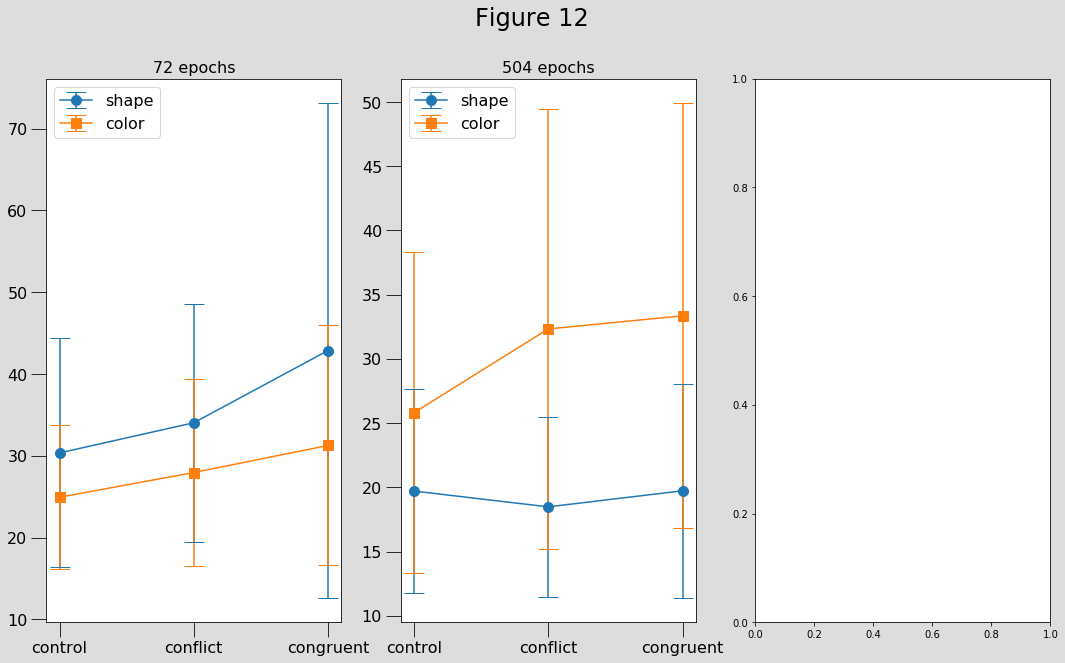

In [54]:
plot_by_condition(fixed_indirect_first_test_results, fixed_indirect_five_day_test_results)


### What about a much lower LR?

In [55]:
fixed_indirect_low_noise_high_int_low_lr_model = shape_naming_model.ShapeNamingModel(
    2, weight_dict=fixed_indirect_weights, direct_learning_rate=0.01,
    noise_std=0.01, integration_rate=0.3, indirect_learning_rate=0)

In [56]:
fixed_indirect_day_one_train = fixed_indirect_low_noise_high_int_low_lr_model.train()
fixed_indirect_first_test_results = fixed_indirect_low_noise_high_int_low_lr_model.test()

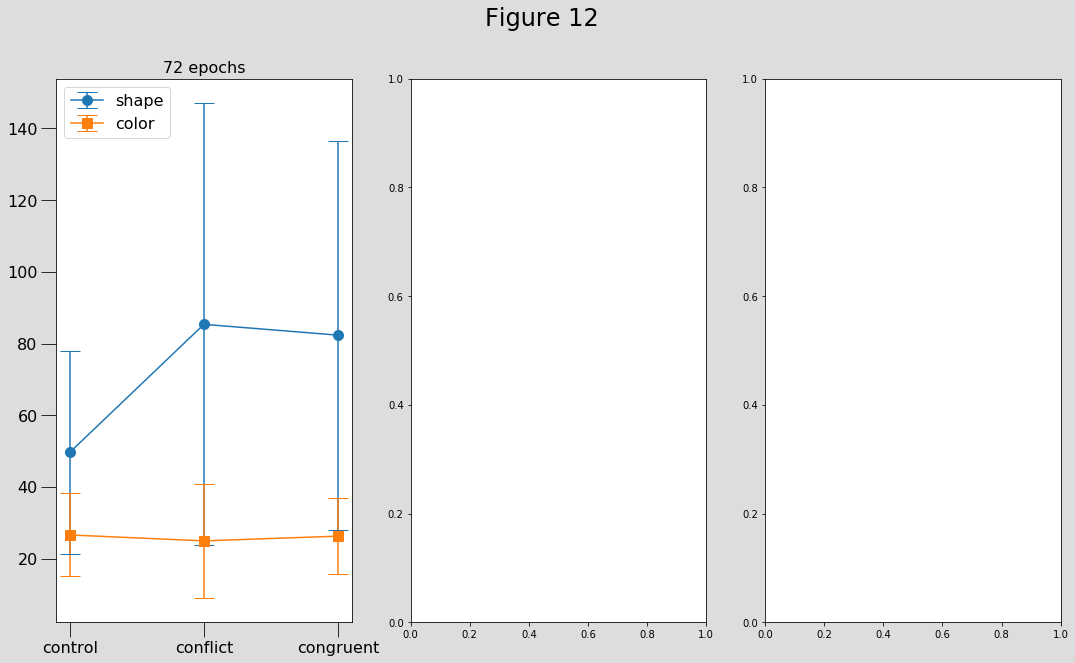

In [57]:
plot_by_condition(fixed_indirect_first_test_results)

In [58]:
for i in range(4):
    fixed_indirect_low_noise_high_int_low_lr_model.train()
    
fixed_indirect_five_day_test_results = fixed_indirect_low_noise_high_int_low_lr_model.test()

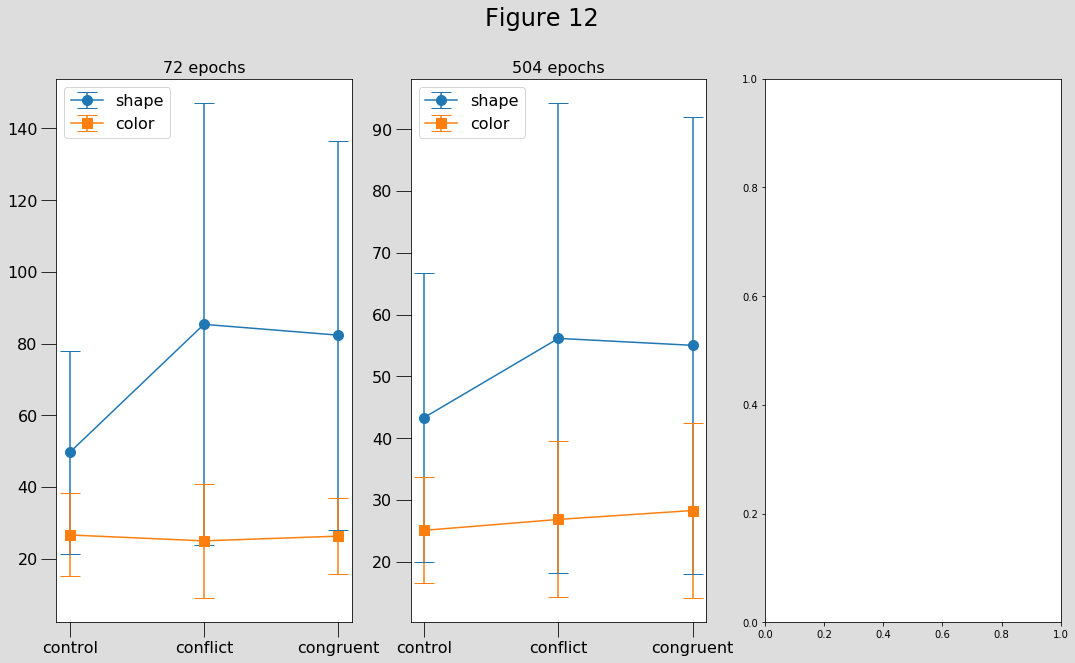

In [59]:
plot_by_condition(fixed_indirect_first_test_results, fixed_indirect_five_day_test_results)


### Pace-wise, this is the first that looks something like what I expected

Let's give it the rest of the epochs and see if the last one looks right

In [60]:
for i in range(26):
    fixed_indirect_low_noise_high_int_low_lr_model.train()
    
fixed_indirect_twenty_day_test_results = \
    fixed_indirect_low_noise_high_int_low_lr_model.test()

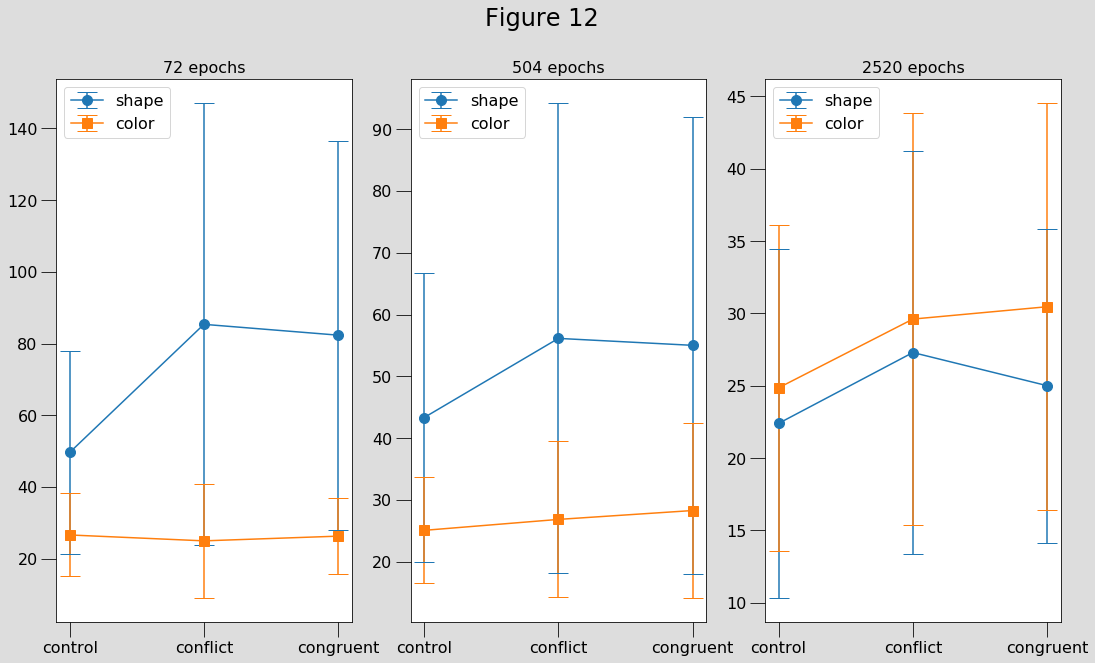

In [61]:
plot_by_condition(fixed_indirect_first_test_results, 
                  fixed_indirect_five_day_test_results,
                 fixed_indirect_twenty_day_test_results)


### Certainly better - however, the error bars are still huge

What about the integrator noise, and a slightly higher learning rate?


In [62]:
lower_accumulator_noise_model = shape_naming_model.ShapeNamingModel(
    2, weight_dict=fixed_indirect_weights, direct_learning_rate=0.02,
    noise_std=0.02, integration_rate=0.2, accumulator_noise_std=0.02, 
    indirect_learning_rate=0)

In [63]:
lower_accumulator_day_one_train = lower_accumulator_noise_model.train()
lower_accumulator_first_test_results = lower_accumulator_noise_model.test()

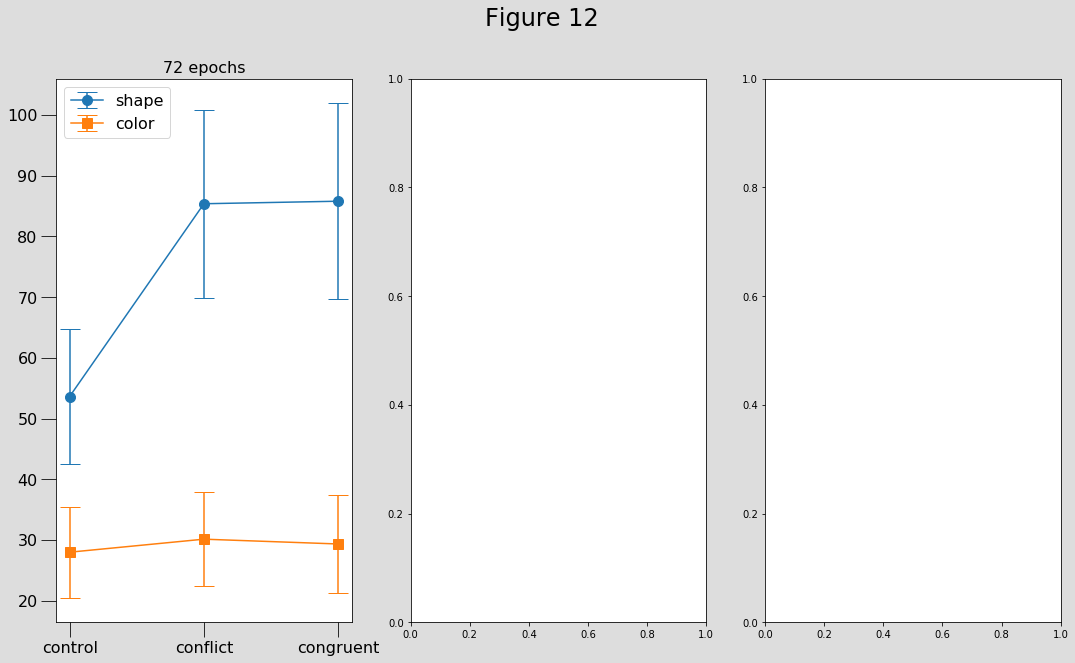

In [64]:
plot_by_condition(lower_accumulator_first_test_results)

In [65]:
for i in range(4):
    lower_accumulator_noise_model.train()
    
lower_accumulator_second_test_results = lower_accumulator_noise_model.test()

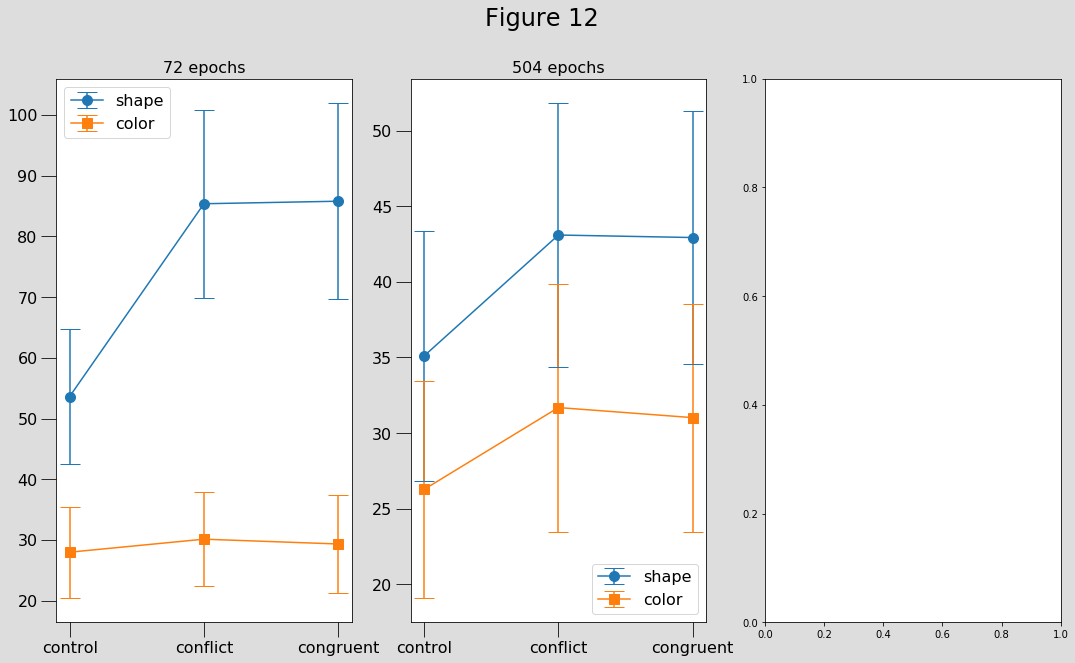

In [66]:
plot_by_condition(lower_accumulator_first_test_results, 
                  lower_accumulator_second_test_results)


In [67]:
for i in range(26):
    lower_accumulator_noise_model.train()
    
lower_accumulator_third_test_results = \
    lower_accumulator_noise_model.test()

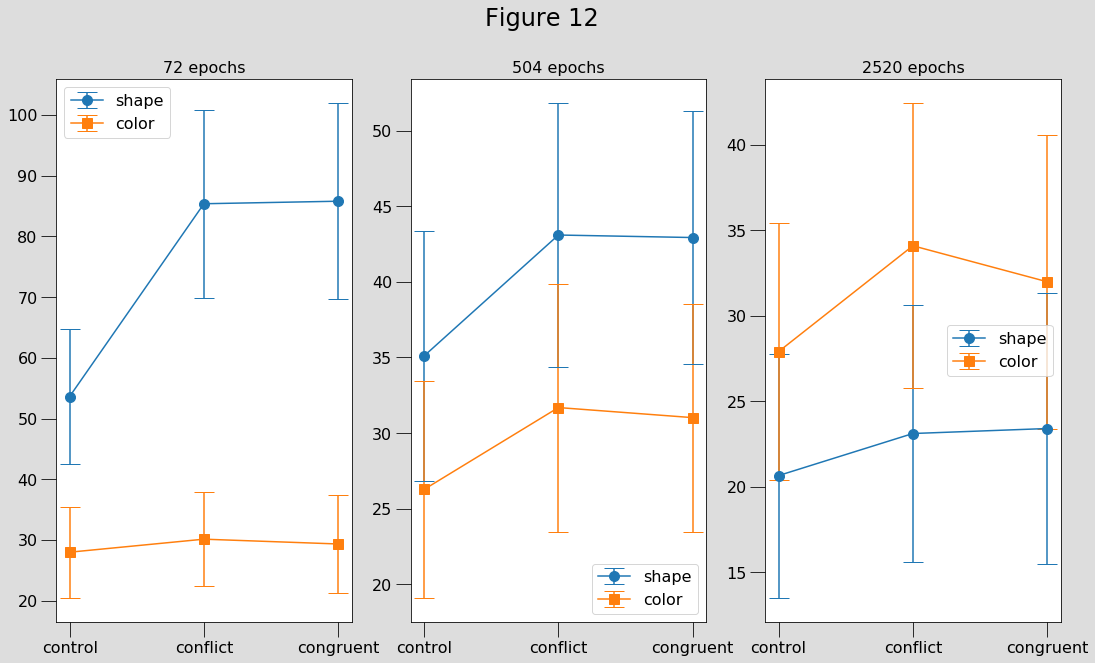

In [68]:
plot_by_condition(lower_accumulator_first_test_results, 
                  lower_accumulator_second_test_results,
                 lower_accumulator_third_test_results)
